# Assignment 1 - Part 2

<div class="alert alert-block alert-warning">
    Below we import <a href="https://github.com/HIPS/autograd">autograd</a>. If you get an error saying you don't have it, you will need to install it with pip, using
<pre>
pip install autograd
</pre>
</div>

In [955]:
import  autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import jacobian, grad

## Newton's Method

We want to approximate solutions of nonlinear equation in __two variables__ using Newton's method.

Newton's method is implemented below.

Implement a stopping criterion. That is, given some tolerance $TOL$, end the method when $\mathbf{x}^k:=(x_1^k,x_2^k)$ satisfies $\|F(\mathbf{x}^k)\|_2\le TOL$ or $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_2\le TOL$.

Provide numerical evidence that your code works as it should by printing the values of $\|F(\mathbf{x}^k)\|_2$ for each iteration, and by making a plot of $\|F(\mathbf{x}^k)\|_2$, $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_2$, for all $k$.

Now, verify numerically the convergence is quadratic. You will need a reference solution, and one can do this in two ways:

 - Consider a problem for which you know an exact solution, and use said solution as a reference solution,
 - or for your problem, should you not know a solution, use the method to obtain an extremely accurate result which you use as a reference solution

In [956]:
def roc(k, S):
    if len(S) > 4:
        return np.log(np.linalg.norm(S[-2]-k)/np.linalg.norm(S[-3]-k))/np.log(np.linalg.norm(S[-3]-k)/np.linalg.norm(S[-4]-k))
    return 0

In [957]:
def newtonsMethod(F, x0, maxIter=100, TOL=1.0e-20):
    # Implementation of Newton's root finding method.
    # F - the function you wish to find the root for,
    # x0 - initial guess,
    # maxIter - maximum number of iterations.
    DF = jacobian(F)
    x1 = x0

    A = []
    I = []
    D = []
    S = []
    
    for k in range(0, maxIter):
        x0 = x1
        J = DF(x0)
        Fx = F(x0)
        x1 = x0 - np.linalg.solve(J,Fx)
        A.append(x1)
        I.append(np.linalg.norm(Fx,2))
        D.append(np.linalg.norm(x1-x0,2))
        if ((np.linalg.norm((x1-x0),2)<=TOL) or (np.linalg.norm(x1,2)<=TOL)) and (k > 4): break

    for i in range(len(A)-1):
        S.append(np.linalg.norm(A[i]-A[-1]))

    print(f"Series:\n{S[-1]/S[-2]**1.2966069431192224}")

    print(f"Rate of convergence:\n{S}\n")

    print("Evolution of ||F(x)||:")
    plt.figure()
    plt.semilogy(I)
    plt.show()
    print("\n")

    print("Evolution of ||x1-x0||:")
    plt.figure()
    plt.semilogy(D)
    plt.show()
    print("\n")

    return x1

Series:
231009.3638144286
Rate of convergence:
[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515624999999e-05, 3.0517578124999993e-05, 1.5258789062499993e-05, 7.629394531249993e-06, 3.8146972656249932e-06, 1.9073486328124932e-06, 9.536743164062432e-07, 4.768371582031182e-07, 2.3841857910155572e-07, 1.1920928955077447e-07, 5.960464477538385e-08, 2.9802322387688536e-08, 1.490116119384088e-08, 7.450580596917052e-09, 3.725290298455138e-09, 1.8626451492241808e-09, 9.313225746087023e-10, 4.65661287300963e-10, 2.3283064364709337e-10, 1.1641532182015855e-10, 5.8207660906691144e-11, 2.910383044995744e-11, 1.4551915221590588e-11, 7.275957607407162e-12, 3.6379788003154494e-12, 1.8189893967695929e-12, 9.094946949966647e-13, 4.5474734411020054e-13, 2.2737366866696848e-13, 1.1368683094535245e-13, 5.6843412084544437e-14, 2.842170265414043e-14, 1.4210847938938426e-14, 7.105420581337424e-15, 3.5527069

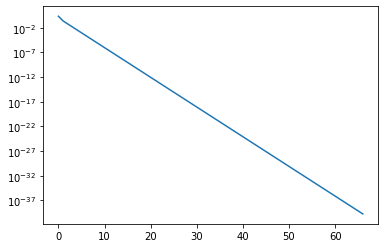



Evolution of ||x1-x0||:


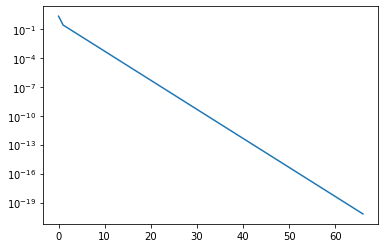



Zero:
[6.77626358e-21 0.00000000e+00]


In [958]:
f = lambda v: np.array([v[0]**2,v[1]])
print(f"Zero:\n{newtonsMethod(f, np.array([1.,2.]))}")

Series:
nan
Rate of convergence:
[0.0, 0.0, 0.0, 0.0, 0.0]

Evolution of ||F(x)||:
<ipython-input-957-ba9b77687e6e>:27: RuntimeWarning: invalid value encountered in double_scalars
  print(f"Series:\n{S[-1]/S[-2]**1.2966069431192224}")


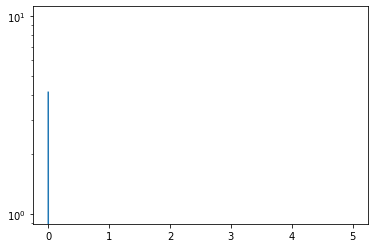



Evolution of ||x1-x0||:


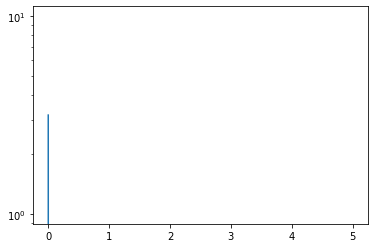



Zero:
[-2.  1.]


In [959]:
g = lambda v: np.array([v[1]+v[0]+1,v[1]-1])
print(f"Zero:\n{newtonsMethod(g,np.array([1.,2.]))}")

## Linear systems

Consider the linear system 
	\begin{equation*}
	A \mathbf{u} = \mathbf{f},
	\end{equation*}
where $A$ is a finite-difference discretization of the 2D Laplacian, this is a block tridiagonal matrix, implemented in the code below, and $\mathbf{f}$ is the vector with all components equal to one.

In [960]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy import linalg

# Creating the 2D laplacian matrix
def create2DLaplacian(nx, ny):
    N  = nx*ny
    main_diag = np.ones(N)*-4.0
    side_diag = np.ones(N-1)
    side_diag[np.arange(1,N)%4==0] = 0
    up_down_diag = np.ones(N-3)
    diagonals = [main_diag,side_diag,side_diag,up_down_diag,up_down_diag]
    laplacian = sparse.diags(diagonals, [0, -1, 1,nx,-nx])
    return laplacian*np.eye(N)

test = create2DLaplacian(3,3)
print(test)

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  1.  0.  0.  0.]
 [ 1.  0.  1. -4.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  1.  0.  1.]
 [ 0.  0.  0.  1.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0. -4.]]


We will now approximate the solution of this linear system using some different iteration methods of the type 
	\begin{equation*}
		A_1 \mathbf{u}^{(k+1)} = A_2 \mathbf{u}^{(k)}+\mathbf{f},
	\end{equation*}
	where $A = A_1 - A_2$ with $|A_1|\ne0$. The way we choose the matrices $A_1$ and $A_2$ depends upon the method. We will use the following iterative methods to calculate approximate solutions to $\mathbf{u}$:

a) Jacobi ($A_1 = A_d$).

b) Forward Gauss-Seidel ($A_1 = A_d-A_l$).

c) Successive over relaxation ($A_1 = A_d-\omega A_l$, where you can choose the value of $\omega\in (0,1)$).

Here $A = A_d - A_l - A_u$, where

- $A_d$ is the diagonal of $A$,
- $A_l$ is $-$(strictly lower triangular part of $A$),
- $A_u$ is $-$(strictly upper triangular part of $A$).

Consider the residual vector $\mathbf{r}^k:=\mathbf{f}-A\mathbf{u}^k$. We fix $nx=ny=10$ and $N=100$. For each of the above, you should:

i) Compare the convergence of each method. Submit  a semi-log plot of the $2$-norm of the relative residual $\frac{ \|\mathbf{r}^k\|_2 }{ \| \mathbf{r}^0\|_2 }$ versus the number of iterations. Plot all the methods in the same plot for comparison.
Experiment choosing different values of $\omega$ in the SOR method, try to find a value that gives you optimal convergence for this problem.


ii) Implement a stopping criterion for the three methods as you have done for the Newton method. Record the relative time each method takes per iteration, and the rime needed to obtain a norm of the relative residual below toleances  $TOL=1e-7$ and $TOL=1e-14$. Make a table with the results for each method.

iii) Calculate the spectral radius of $A_1^{-1}A_2$ and see how that relates to convergence of the method. Make a semi-log plot for comparison. 

<div class="alert alert-block alert-info">
<b>Hint:</b> Python's 
    <pre>numpy.linalg.eigvals(A)</pre>
function returns the eigenvalues of $A$.
</div>

In [961]:
toRun = create2DLaplacian(10,10)
print(toRun)

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


In [962]:
def extractDiagonal(A):
    return np.diag(np.diag(A))

def extractLower(A):
    return -1*sparse.tril(A,-1)*np.identity(A.shape[0])

def extractUpper(A):
    return -1*sparse.triu(A,1)*np.identity(A.shape[0])

In [963]:
def getSpectralRadii(A):
    return np.linalg.norm(np.linalg.eigvals(A), np.inf)

In [964]:
def generalIteration(A, B, C, f, u0, maxIter, TOL):
    u1 = u0

    Iter = [u0]

    for i in range(maxIter):
        u0 = u1
        u1 = B @ (C @ u0 + f)
        Iter.append(u1)
        if (np.linalg.norm(A@u1-f) <= TOL) or (np.linalg.norm(u1-u0) <= TOL) : break

    return (Iter, list(map(lambda x: f - A@x, Iter)))

In [965]:
def jacobiMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    inv = lambda x: 1/x 
    A1Inv = np.diag(inv(np.diag(A)))
    A2 = extractDiagonal(A) - A

    print(f"Spectralradius:\n{getSpectralRadii(A1Inv@A2)}")

    return generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

In [966]:
def ForwardGSMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    A1Inv = np.linalg.inv(extractDiagonal(A) - extractLower(A))
    A2 = extractUpper(A)

    print(f"Spectralradius:\n{getSpectralRadii(A1Inv@A2)}")

    return generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

In [967]:
def SuccessOverRelaxMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    if len(list(args)) == 0:
        w = 0.5
    else:
        w = args[0]
    print(w)
    A1Inv = np.linalg.inv(extractDiagonal(A) - w*extractLower(A))
    A2 = (1-w)*extractLower(A) + extractUpper(A)

    print(f"Spectralradius:\n{getSpectralRadii(A1Inv@A2)}")

    return generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

In [968]:
np.random.seed()

def testIteration(Iterative, A = test, f = np.random.rand(9), u0 = np.random.rand(9), maxIter = 50, TOL = 1e-10, *args):
    (out, res) = Iterative(A, f, u0, maxIter, TOL, *args)

    print(f"u0:\n{u0}")
    print(f"f:\n{f}")
    print(f"Solution:\n{out[-1]}")

    #res.insert(0,np.random.rand(9))
    relRes = [np.linalg.norm(x)/np.linalg.norm(res[0]) for x in res]
    plt.semilogx(relRes)

    diffRes = []

    for i in range(1, len(relRes)-1):
        diffRes.append(np.log(relRes[i+1])/np.log(relRes[i]))

    print(f"Rate of convergence:\n{diffRes[-1]}")

Spectralradius:
0.7191538959793043
u0:
[0.29721665 0.73669182 0.55584343 0.92647874 0.93219179 0.98343273
 0.470034   0.78987594 0.43058744]
f:
[0.4043828  0.49988188 0.81789078 0.50758344 0.97902492 0.62005307
 0.00683678 0.40454306 0.07308577]
Solution:
[-0.33841961 -0.50602722 -0.58613448 -0.44326843 -0.59967292 -0.57735149
 -0.34093619 -0.33628804 -0.16260932]
Rate of convergence:
1.0139995683565846


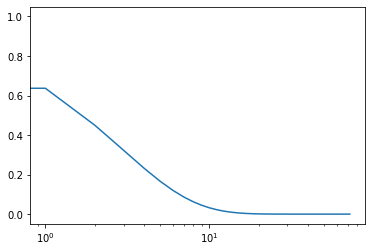

In [969]:
testIteration(jacobiMeth, maxIter = 1000)

Spectralradius:
0.5254623809704714
u0:
[0.29721665 0.73669182 0.55584343 0.92647874 0.93219179 0.98343273
 0.470034   0.78987594 0.43058744]
f:
[0.4043828  0.49988188 0.81789078 0.50758344 0.97902492 0.62005307
 0.00683678 0.40454306 0.07308577]
Solution:
[-0.33841961 -0.50602722 -0.58613448 -0.44326843 -0.59967292 -0.57735149
 -0.34093619 -0.33628804 -0.16260932]
Rate of convergence:
1.0271524056065413


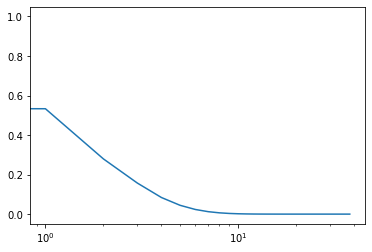

In [970]:
testIteration(ForwardGSMeth, maxIter = 1000)

0.1
Spectralradius:
0.7086106003883906
u0:
[0.7443827  0.14270036 0.24623293 0.48873954 0.10663198 0.05481757
 0.33455372 0.48854365 0.1787174 ]
f:
[0.09196707 0.57650855 0.20931742 0.94331376 0.37302242 0.45179877
 0.07481035 0.94893308 0.70504017]
Solution:
[-0.24926695 -0.41358342 -0.40057336 -0.49151734 -0.42798485 -0.48787528
 -0.37291531 -0.43745831 -0.29822886]
Rate of convergence:
1.0197234888285367


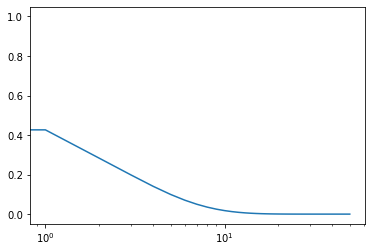

In [971]:
testIteration(SuccessOverRelaxMeth, test, np.random.rand(9), np.random.rand(9), 50, 1e-10, 0.1)